In [2]:
import pandas as pd

# Datensatz erneut laden mit korrekter Kodierung
file_path = "Sample-Superstore.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Datumsfelder konvertieren
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Neue Zeitspalten erzeugen
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')
df['Order Weekday'] = df['Order Date'].dt.day_name()

# Übersicht über die neu erzeugten Spalten
df_new_cols = df[['Order Date', 'Order Year', 'Order Month', 'Order Quarter', 'Order Weekday']].head()



In [3]:
df_new_cols.head()

,Order Date,Order Year,Order Month,Order Quarter,Order Weekday
0,2016-11-08,2016,11,2016Q4,Tuesday
1,2016-11-08,2016,11,2016Q4,Tuesday
2,2016-06-12,2016,6,2016Q2,Sunday
3,2015-10-11,2015,10,2015Q4,Sunday
4,2015-10-11,2015,10,2015Q4,Sunday


In [4]:
# Schritt: Datenbereinigung und Qualitätsprüfung

# 1. Nullwerte prüfen
nulls = df.isnull().sum().sort_values(ascending=False)

# 2. Doppelte Zeilen prüfen
duplicates = df.duplicated().sum()

# 3. Prüfen, ob alle Postleitzahlen und Kundennamen vorhanden sind
missing_postal = df['Postal Code'].isnull().sum()
missing_names = df['Customer Name'].isnull().sum()

# 4. Datentypen prüfen und ggf. korrigieren
# Konvertieren von 'Postal Code' zu String (da PLZ keine mathematische Einheit ist)
df['Postal Code'] = df['Postal Code'].astype(str)

# Sicherstellen, dass 'Sales' und 'Profit' als float gespeichert sind
df['Sales'] = df['Sales'].astype(float)
df['Profit'] = df['Profit'].astype(float)

# Zusammenfassung der Prüfergebnisse
data_quality_report = {
    "Anzahl Nullwerte je Spalte": nulls,
    "Anzahl doppelter Zeilen": duplicates,
    "Fehlende Postleitzahlen": missing_postal,
    "Fehlende Kundennamen": missing_names,
    "Datentypen": df.dtypes
}

data_quality_report


{'Anzahl Nullwerte je Spalte': Row ID           0
 Product ID       0
 Order Quarter    0
 Order Year       0
 Order Month      0
 Profit           0
 Discount         0
 Quantity         0
 Sales            0
 Product Name     0
 Sub-Category     0
 Category         0
 Region           0
 Order ID         0
 Postal Code      0
 State            0
 City             0
 Country          0
 Segment          0
 Customer Name    0
 Customer ID      0
 Ship Mode        0
 Ship Date        0
 Order Date       0
 Order Weekday    0
 dtype: int64,
 'Anzahl doppelter Zeilen': np.int64(0),
 'Fehlende Postleitzahlen': np.int64(0),
 'Fehlende Kundennamen': np.int64(0),
 'Datentypen': Row ID                    int64
 Order ID                 object
 Order Date       datetime64[ns]
 Ship Date        datetime64[ns]
 Ship Mode                object
 Customer ID              object
 Customer Name            object
 Segment                  object
 Country                  object
 City                   

In [5]:
# Neue CSV-Datei speichern mit erweiterten Spalten (für späteren Einsatz in Tableau oder GitHub)
output_path = "ecommerce_cleaned.csv"
df.to_csv(output_path, index=False)

output_path


'ecommerce_cleaned.csv'

In [6]:
import pandas as pd

# Datensatz erneut laden mit korrekter Kodierung
file_path = "ecommerce_cleaned.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Quarter,Order Weekday
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,2016Q4,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,2016Q4,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,2016Q2,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,2015Q4,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,2015Q4,Sunday


/var/folders/tq/9nvqt2l90bvcrsjk_4877y_00000gn/T/ipykernel_808/228663670.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='Sales', y='State', palette='viridis')


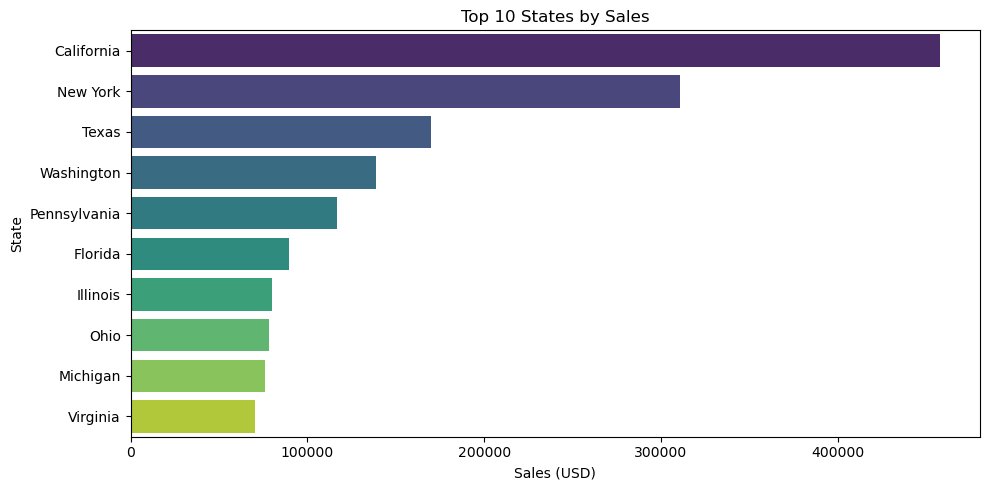

/var/folders/tq/9nvqt2l90bvcrsjk_4877y_00000gn/T/ipykernel_808/228663670.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Sales', palette='Set2')


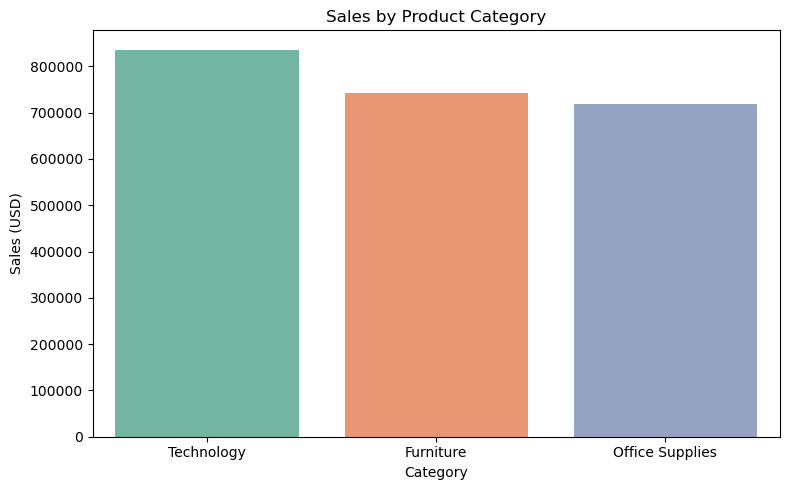

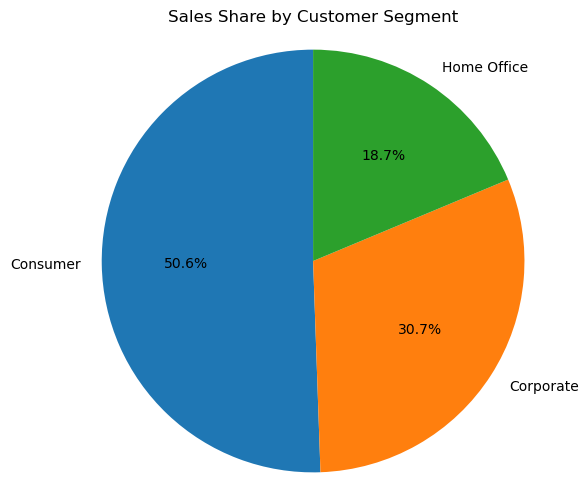

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 States by Sales
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Sales by Product Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# Sales by Customer Segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).reset_index()

# Plot: Top 10 States by Sales
plt.figure(figsize=(10, 5))
sns.barplot(data=top_states, x='Sales', y='State', palette='viridis')
plt.title('Top 10 States by Sales')
plt.xlabel('Sales (USD)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Plot: Sales by Product Category
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='Sales', palette='Set2')
plt.title('Sales by Product Category')
plt.ylabel('Sales (USD)')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

# Plot: Sales Share by Customer Segment
plt.figure(figsize=(6, 6))
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%1.1f%%', startangle=90)
plt.title('Sales Share by Customer Segment')
plt.axis('equal')
plt.show()


In [8]:
# Full cleaned and correct version of the code block for EDA

import pandas as pd

# Ensure date columns are datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# A. TIME-BASED ANALYSIS

# 📈 Sales and Profit Trends by Month and Year
monthly_trend = df.groupby(['Order Year', 'Order Month'])[['Sales', 'Profit']].sum().reset_index()
monthly_trend['Date'] = pd.to_datetime(monthly_trend['Order Year'].astype(str) + '-' + monthly_trend['Order Month'].astype(str))

# 📆 Orders by Weekday
weekday_orders = df['Order Weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
weekday_orders.columns = ['Weekday', 'Orders']

# B. GEOGRAPHIC ANALYSIS

# 📍 Top 5 and Bottom 5 States by Sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
top_5_states = state_sales.head(5).reset_index()
bottom_5_states = state_sales.tail(5).reset_index()

# 📦 State with Most Orders
state_orders = df['State'].value_counts().reset_index()
state_orders.columns = ['State', 'Order Count']

# C. CUSTOMER SEGMENTS

# 👥 Segment Distribution
segment_dist = df['Segment'].value_counts().reset_index()
segment_dist.columns = ['Segment', 'Count']

# 🆕 Monthly Growth of New Customers
df['Customer First Order'] = df.groupby('Customer ID')['Order Date'].transform('min')
df['Customer First Order'] = pd.to_datetime(df['Customer First Order'], errors='coerce')
new_customers_per_month = df.drop_duplicates(subset='Customer ID').groupby(
    [df['Customer First Order'].dt.to_period('M')]).size().reset_index(name='New Customers')
new_customers_per_month['Customer First Order'] = new_customers_per_month['Customer First Order'].astype(str)

# D. PRODUCT-BASED INSIGHTS

# 📊 Top-Selling Sub-Categories by Quantity
top_subcategories = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).reset_index()

# 💸 Categories with Highest Profit
profit_per_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).reset_index()

# Display results for visualization
# Einfach anzeigen
print("Monthly Sales & Profit")
print(monthly_trend.head())

print("Orders by Weekday")
print(weekday_orders)

print("Top 5 States by Sales")
print(top_5_states)

# Oder wenn du in einem Jupyter Notebook bist:
from IPython.display import display
display(monthly_trend)
display(weekday_orders)
display(top_5_states)


Monthly Sales & Profit
   Order Year  Order Month      Sales     Profit       Date
0        2014            1  14236.895  2450.1907 2014-01-01
1        2014            2   4519.892   862.3084 2014-02-01
2        2014            3  55691.009   498.7299 2014-03-01
3        2014            4  28295.345  3488.8352 2014-04-01
4        2014            5  23648.287  2738.7096 2014-05-01
Orders by Weekday
     Weekday  Orders
0     Monday    1871
1    Tuesday    1106
2  Wednesday     371
3   Thursday    1463
4     Friday    1818
5   Saturday    1655
6     Sunday    1710
Top 5 States by Sales
          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140


,Order Year,Order Month,Sales,Profit,Date
0,2014,1,14236.8950,2450.1907,2014-01-01
1,2014,2,4519.8920,862.3084,2014-02-01
2,2014,3,55691.0090,498.7299,2014-03-01
3,2014,4,28295.3450,3488.8352,2014-04-01
4,2014,5,23648.2870,2738.7096,2014-05-01
5,2014,6,34595.1276,4976.5244,2014-06-01
6,2014,7,33946.3930,-841.4826,2014-07-01
7,2014,8,27909.4685,5318.1050,2014-08-01
8,2014,9,81777.3508,8328.0994,2014-09-01
9,2014,10,31453.3930,3448.2573,2014-10-01


,Weekday,Orders
0,Monday,1871
1,Tuesday,1106
2,Wednesday,371
3,Thursday,1463
4,Friday,1818
5,Saturday,1655
6,Sunday,1710


,State,Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140


In [9]:
# CSV-Dateien für Tableau exportieren
export_paths = {
    "monthly_trend.csv": monthly_trend,
    "weekday_orders.csv": weekday_orders,
    "state_sales_top.csv": top_5_states,
    "state_sales_bottom.csv": bottom_5_states,
    "state_orders.csv": state_orders,
    "segment_distribution.csv": segment_dist,
    "new_customers.csv": new_customers_per_month,
    "subcategories_quantity.csv": top_subcategories,
    "category_profit.csv": profit_per_category
}

# Speicherpfad und Export
for filename, df_out in export_paths.items():
    df_out.to_csv(f"{filename}", index=False)

list(export_paths.keys())


['monthly_trend.csv',
 'weekday_orders.csv',
 'state_sales_top.csv',
 'state_sales_bottom.csv',
 'state_orders.csv',
 'segment_distribution.csv',
 'new_customers.csv',
 'subcategories_quantity.csv',
 'category_profit.csv']

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)


In [11]:
state_sales = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)


In [12]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)


In [13]:
df['Customer First Purchase'] = df.groupby('Customer ID')['Order Date'].transform('min')
new_customers = df[df['Order Date'] == df['Customer First Purchase']]
new_customers['Month'] = new_customers['Order Date'].dt.to_period('M')
new_customers_count = new_customers.groupby('Month')['Customer ID'].nunique().reset_index()
new_customers_count.columns = ['Month', 'New Customers']
new_customers_count['Month'] = new_customers_count['Month'].astype(str)


/var/folders/tq/9nvqt2l90bvcrsjk_4877y_00000gn/T/ipykernel_808/2063200347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customers['Month'] = new_customers['Order Date'].dt.to_period('M')


In [14]:
export_paths = {
    "monthly_sales.csv": monthly_sales,
    "state_sales.csv": state_sales,
    "segment_sales.csv": segment_sales,
    "new_customers.csv": new_customers_count
}

for filename, df_out in export_paths.items():
    df_out.to_csv(f"{filename}", index=False)


In [15]:
aov = df.groupby('Order ID')['Sales'].sum().mean()
print(f"Average Order Value: {aov:.2f}")


Average Order Value: 458.61


In [16]:
pd.DataFrame({'AOV': [aov]}).to_csv("aov.csv", index=False)


In [17]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100
print(f"Net Profit Margin: {profit_margin:.2f}%")


Net Profit Margin: 12.47%


In [18]:
pd.DataFrame({'Net Profit Margin': [profit_margin]}).to_csv("profit_margin.csv", index=False)


In [19]:
customer_order_counts = df.groupby('Customer ID')['Order ID'].nunique()
repeat_customers = (customer_order_counts > 1).sum()
total_customers = customer_order_counts.shape[0]
repeat_rate = (repeat_customers / total_customers) * 100
print(f"Repeat Customer Rate: {repeat_rate:.2f}%")


Repeat Customer Rate: 98.49%


In [20]:
pd.DataFrame({'Repeat Customer Rate': [repeat_rate]}).to_csv("repeat_customers.csv", index=False)


In [21]:
import pandas as pd

# Lade die bereits bekannten CSV-Dateien 
monthly_sales = pd.read_csv("monthly_sales.csv")
new_customers = pd.read_csv("new_customers.csv")
state_sales = pd.read_csv("state_sales.csv")
segment_sales = pd.read_csv("segment_sales.csv")
aov = pd.read_csv("aov.csv")
profit_margin = pd.read_csv("profit_margin.csv")
repeat_customers = pd.read_csv("repeat_customers.csv")

# Erzeuge ein gemeinsames DataFrame mit dem jeweils gleichen 'Month' als Merge-Schlüssel (sofern vorhanden)
# Wir beginnen mit monthly_sales und fügen neue Kunden hinzu
combined = pd.merge(monthly_sales, new_customers, on="Month", how="left")

# Ergänze AOV, Profit Margin und Repeat Rate (gleiche Werte für alle Zeilen, da sie aggregierte KPIs sind)
combined["Average Order Value"] = aov.iloc[0, 0]
combined["Net Profit Margin"] = profit_margin.iloc[0, 0]
combined["Repeat Customer Rate"] = repeat_customers.iloc[0, 0]

# Kombiniere segment_sales und state_sales als separate Tabellen in neuen Spalten (vereinfachte Darstellung)
# Wir fügen sie als strukturierte Strings an
combined["Sales by Segment"] = ", ".join([f"{row['Segment']}: {row['Sales']}" for _, row in segment_sales.iterrows()])
combined["Sales by State (Top5)"] = ", ".join([f"{row['State']}: {row['Sales']}" for _, row in state_sales.head(5).iterrows()])

# Speichere als eine kombinierte CSV
combined.to_csv("ecommerce_combined_dashboard.csv", index=False)


In [24]:
import pandas as pd
df= pd.read_csv("ecommerce_combined_dashboard.csv")
df.head()


,Month,Sales,New Customers,Average Order Value,Net Profit Margin,Repeat Customer Rate,Sales by Segment,Sales by State (Top5)
0,2014-01,14236.895,32.0,458.614666,12.467217,98.486759,"Consumer: 1161401.345, Corporate: 706146.3668,...","California: 457687.6315, New York: 310876.271,..."
1,2014-02,4519.892,24.0,458.614666,12.467217,98.486759,"Consumer: 1161401.345, Corporate: 706146.3668,...","California: 457687.6315, New York: 310876.271,..."
2,2014-03,55691.009,65.0,458.614666,12.467217,98.486759,"Consumer: 1161401.345, Corporate: 706146.3668,...","California: 457687.6315, New York: 310876.271,..."
3,2014-04,28295.345,56.0,458.614666,12.467217,98.486759,"Consumer: 1161401.345, Corporate: 706146.3668,...","California: 457687.6315, New York: 310876.271,..."
4,2014-05,23648.287,56.0,458.614666,12.467217,98.486759,"Consumer: 1161401.345, Corporate: 706146.3668,...","California: 457687.6315, New York: 310876.271,..."


In [26]:
import pandas as pd

# Beispiel: String aus deiner CSV-Spalte
sales_string = "California: 457687.63, New York: 310876.27, Texas: 170188.04, Washington: 138641.27, Pennsylvania: 116511.91"

# In Liste umwandeln: [("California", 457687.63), ...]
state_sales_list = [item.strip().split(": ") for item in sales_string.split(",")]
state_sales_df = pd.DataFrame(state_sales_list, columns=["State", "Sales"])

# Datentyp konvertieren
state_sales_df["Sales"] = state_sales_df["Sales"].astype(float)

# Speichern als CSV für Tableau (UTF-8 kodiert)
state_sales_df.to_csv("state_sales_tableau_ready.csv", index=False, encoding='utf-8')
state_sales_df["Sales"] = state_sales_df["Sales"].astype(float)
state_sales_df.to_csv("state_sales_tableau_ready.csv", index=False, encoding="utf-8")



In [28]:
import pandas as pd

# 1. CSV-Datei laden (Pfad anpassen, falls nötig)
df = pd.read_csv("state_orders.csv")

# 2. Spalten bereinigen
df["State"] = df["State"].astype(str).str.strip()  # Entfernt Leerzeichen
df["Order Count"] = pd.to_numeric(df["Order Count"], errors="coerce")  # Wandelt in Zahl

# 3. Optionale Prüfung auf fehlende Werte (nur zur Kontrolle)
print(df.isnull().sum())

# 4. Neue CSV-Datei speichern – UTF-8 für Tableau
df.to_csv("state_orders_cleaned.csv", index=False, encoding="utf-8")

print("✅ Datei gespeichert als 'state_orders_cleaned.csv'")


State          0
Order Count    0
dtype: int64
✅ Datei gespeichert als 'state_orders_cleaned.csv'


In [30]:
# Lese die Datei mit expliziter Angabe des Encodings (ISO-8859-1 als häufiges Ersatzformat bei Excel-Dateien)
df = pd.read_csv("Sample-Superstore.csv", encoding="ISO-8859-1")

# Konvertiere das Bestelldatum
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Extrahiere das Jahr
df["Year"] = df["Order Date"].dt.year

# Gruppiere nach Jahr und berechne Order Count und Total Sales
aov_by_year = df.groupby("Year").agg(
    Order_Count=("Order ID", "count"),
    Total_Sales=("Sales", "sum")
).reset_index()

# Berechne AOV
aov_by_year["AOV"] = aov_by_year["Total_Sales"] / aov_by_year["Order_Count"]
aov_by_year["AOV"] = aov_by_year["AOV"].round(2)

# Speichere als CSV
output_path = "aov_by_year.csv"
aov_by_year.to_csv(output_path, index=False)




In [31]:
df = pd.read_csv("Sample-Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Nach Kernel-Reset: Importiere erneut benötigte Pakete
import pandas as pd

# Lade die Sample-Superstore-Daten
df = pd.read_csv("Sample-Superstore.csv", encoding="ISO-8859-1")

# Konvertiere das Datumsfeld
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.to_period("M").astype(str)

# Erzeuge neue, kombinierte DataFrame mit den wichtigsten Dimensionen für das Dashboard
df_dashboard = df[[
    "Order ID", "Order Date", "Order Year", "Order Month",
    "Segment", "Category", "Sub-Category",
    "State", "City", "Sales", "Profit", "Quantity", "Discount", "Customer ID"
]]

# Speichere als neue Datei für Tableau-Dashboard
output_path = "superstore_dashboard_ready.csv"
df_dashboard.to_csv(output_path, index=False)





,Order ID,Order Date,Order Year,Order Month,Segment,Category,Sub-Category,State,City,Sales,Profit,Quantity,Discount,Customer ID
0,CA-2016-152156,2016-11-08,2016,2016-11,Consumer,Furniture,Bookcases,Kentucky,Henderson,261.9600,41.9136,2,0.00,CG-12520
1,CA-2016-152156,2016-11-08,2016,2016-11,Consumer,Furniture,Chairs,Kentucky,Henderson,731.9400,219.5820,3,0.00,CG-12520
2,CA-2016-138688,2016-06-12,2016,2016-06,Corporate,Office Supplies,Labels,California,Los Angeles,14.6200,6.8714,2,0.00,DV-13045
3,US-2015-108966,2015-10-11,2015,2015-10,Consumer,Furniture,Tables,Florida,Fort Lauderdale,957.5775,-383.0310,5,0.45,SO-20335
4,US-2015-108966,2015-10-11,2015,2015-10,Consumer,Office Supplies,Storage,Florida,Fort Lauderdale,22.3680,2.5164,2,0.20,SO-20335


In [35]:
# Lade die vom Nutzer hochgeladene Datei neu
df_uploaded = pd.read_csv("superstore_dashboard_ready.csv", encoding="ISO-8859-1")

# Versuche, Datum zu parsen und zusätzliche Spalten zu erstellen
df_uploaded["Order Date"] = pd.to_datetime(df_uploaded["Order Date"], errors="coerce")
df_uploaded["Order Year"] = df_uploaded["Order Date"].dt.year
df_uploaded["Order Month"] = df_uploaded["Order Date"].dt.to_period("M").astype(str)

# Überprüfe, ob eventuell Zeilenumbrüche oder unsichtbare Zeichen im Header sind
df_uploaded.columns.tolist()


# Speichere die Datei neu mit Komma als Trennzeichen und korrekter Kodierung
corrected_path = "superstore_dashboard_corrected.csv"
df_uploaded.to_csv(corrected_path, index=False, sep=",", encoding="utf-8")

